Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
dataset = pd.read_csv('medicine.csv')
dataset.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


Data preprocessing

In [4]:
dataset.isnull().sum()

,0
index,0
Drug_Name,0
Reason,0
Description,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        9720 non-null   int64 
 1   Drug_Name    9720 non-null   object
 2   Reason       9720 non-null   object
 3   Description  9720 non-null   object
dtypes: int64(1), object(3)
memory usage: 303.9+ KB


In [7]:
dataset = dataset.drop(columns=['index'], errors='ignore')

Convert the categorical target variable into numerical labels

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
dataset['Reason_encoded'] = label_encoder.fit_transform(dataset['Reason'])

In [11]:
dataset

,Drug_Name,Reason,Description,Reason_encoded
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots),0
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...,0
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...,0
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...,0
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...,0
...,...,...,...,...
9715,T Muce Ointment 5gm,Wound,used for treating warts,49
9716,Wokadine 10% Solution 100mlWokadine Solution 5...,Wound,used to soften the skin cells,49
9717,Wokadine M Onit 10gm,Wound,used for scars,49
9718,Wound Fix Solution 100ml,Wound,used for wounds,49


In [13]:
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
description_features = tfidf.fit_transform(dataset['Description']).toarray()

In [14]:
print(description_features)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.59971793 0.         0.        ]
 [0.25692206 0.         0.         ... 0.         0.20966681 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [16]:
features = pd.DataFrame(description_features, columns=tfidf.get_feature_names_out())
features['Reason_encoded'] = dataset['Reason_encoded']

In [17]:
features

,12,16,abdominal,able,acid,acne,adequately,adult,adults,affect,...,withdrawn,womb,women,works,worsening,wounds,wrinkles,years,œpancreatic,Reason_encoded
0,0.000000,0.0,0.0,0.0,0.0,0.402983,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.599718,0.000000,0.0,0
2,0.256922,0.0,0.0,0.0,0.0,0.344357,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.209667,0.0,0
3,0.256922,0.0,0.0,0.0,0.0,0.344357,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.209667,0.0,0
4,0.000000,0.0,0.0,0.0,0.0,0.647418,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,49
9716,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,49
9717,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,49
9718,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.943425,0.000000,0.000000,0.0,49


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = features.drop(columns=['Reason_encoded'])
y = features['Reason_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
preprocessed_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'label_encoder': label_encoder,
    'tfidf_vectorizer': tfidf
}

KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
labels = sorted(set(y_train))
report = classification_report(y_test, y_pred, labels=labels, target_names=label_encoder.inverse_transform(labels))
print(report)

0.9804526748971193
                   precision    recall  f1-score   support

             Acne       0.85      1.00      0.92        46
             Adhd       0.00      0.00      0.00         3
        Allergies       1.00      0.82      0.90        40
        Alzheimer       1.00      0.96      0.98        25
       Amoebiasis       1.00      0.71      0.83         7
          Anaemia       0.97      1.00      0.98        60
           Angina       1.00      1.00      1.00        36
          Anxiety       1.00      1.00      1.00        23
         Appetite       1.00      1.00      1.00        14
    Arrhythmiasis       1.00      1.00      1.00         3
        Arthritis       1.00      1.00      1.00        37
         Cleanser       0.83      1.00      0.91        10
     Constipation       1.00      1.00      1.00        14
    Contraception       1.00      1.00      1.00        24
         Dandruff       1.00      1.00      1.00        10
       Depression       1.00      1.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [34]:
import seaborn as sns

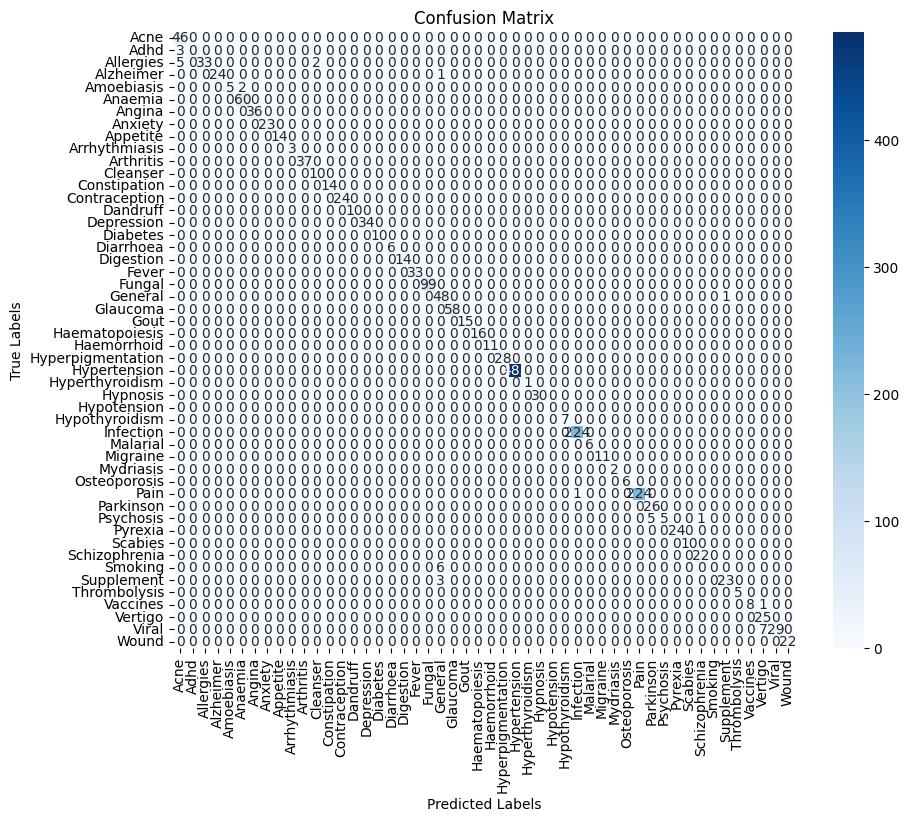

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform(labels), yticklabels=label_encoder.inverse_transform(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [46]:
def recommend_top5_medicines(input_reason):
    # Transform input_reason using the trained TF-IDF vectorizer
    input_features = tfidf.transform([input_reason]).toarray()

    # Predict the encoded label using the KNN model
    predicted_label = knn.predict(input_features)[0]

    # Find the top 5 recommended medicines
    matching_medicines = dataset[dataset['Reason_encoded'] == predicted_label]['Drug_Name'].value_counts()
    top_5_medicines = matching_medicines.head(5).index.tolist()

    return label_encoder.inverse_transform([predicted_label])[0], top_5_medicines


In [48]:
example_reason = "malaria"
predicted_condition, top_5_medicines = recommend_top5_medicines(example_reason)
print(f"Predicted Condition: {predicted_condition}")
print("Top 5 Recommended Medicines:")
for medicine in top_5_medicines:
    print(f"- {medicine}")


Predicted Condition: Malarial
Top 5 Recommended Medicines:
- RAUX L Tablet 6's
- RAUX L PLUS Tablet 6's
- Svizther 150mg Injection 2ml
- Svizunate 50mg Tablet 6'SSvizunate 60mg Injection 5ml
- Synriam Tablet 3'S


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.metrics.pairwise import cosine_similarity


In [50]:
similarity = cosine_similarity(description_features)

def recommend_similar_medicines(medicine):
    # Find the index of the given medicine
    medicine_index = dataset[dataset['Drug_Name'] == medicine].index[0]

    # Get similarity scores for the given medicine
    distances = similarity[medicine_index]

    # Get top 5 most similar medicines (excluding itself)
    medicines_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    # Print the top 5 similar medicines
    print(f"Top 5 medicines similar to {medicine}:")
    for i in medicines_list:
        print(f"- {dataset.iloc[i[0]].Drug_Name}")

# Example Usage of Similar Medicines Function
example_medicine = "A CN Gel(Topical) 20gmA CN Soap 75gm"
recommend_similar_medicines(example_medicine)

Top 5 medicines similar to A CN Gel(Topical) 20gmA CN Soap 75gm:
- Acnedap Gel 15gm
- Acnetoin 20mg Capsule 10'SAcnetoin Gel 15gm
- Acnin Pimple Care Face Pack 50gm
- Adapnil Gel 15gm
- Alene Gel 15gm
